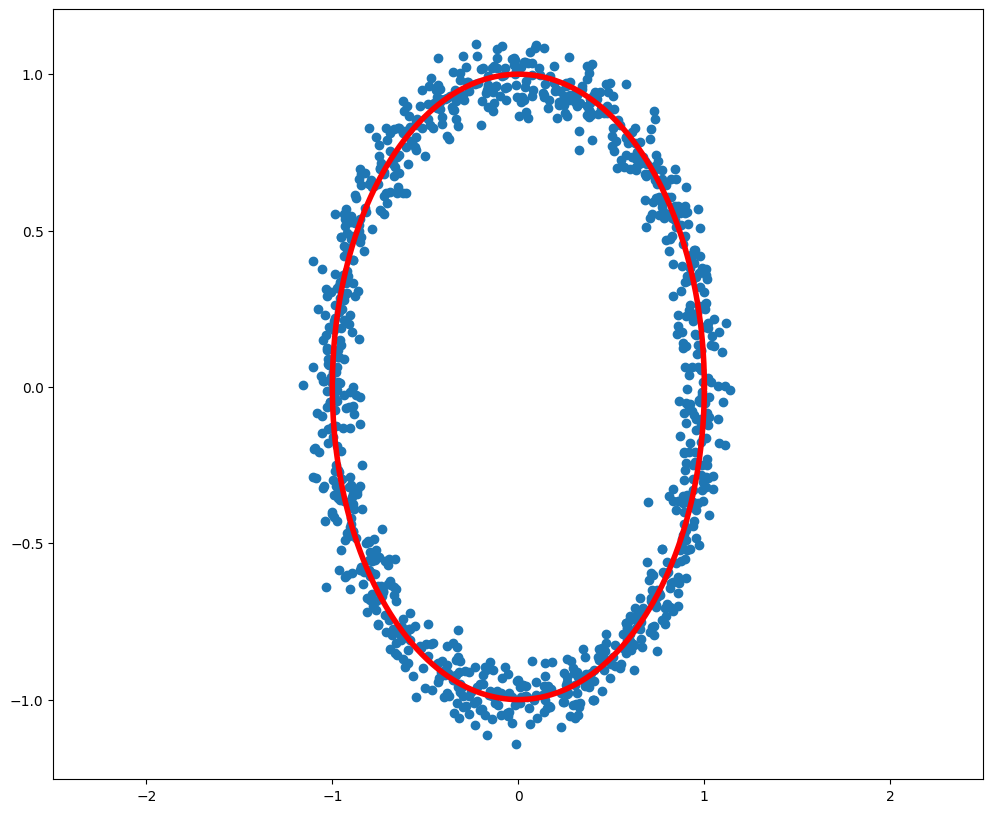

In [69]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

x1 = np.linspace(0, 2 * np.pi, 1000)

fx = np.cos(x1)
fy = np.sin(x1)


dots = np.vstack([fx, fy]).T
noise = 0.06 * np.random.randn(*dots.shape)
dots += noise

from itertools import cycle
size = 25
colors = ["r", "g", "c", "y", "m"]
idxs = range(0, x1.shape[0], x1.shape[0]//size)
vx1 = x1[idxs]
vdots = dots[idxs]

plt.figure(figsize=(12, 10))
plt.xlim([-2.5, 2.5])
plt.scatter(dots[:, 0], dots[:, 1])
plt.plot(fx, fy,  color="red", linewidth=4)
plt.grid(False)

In [70]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam

def linear_ae():
    input_dots = Input((2,))
    code = Dense(1, activation='linear')(input_dots)
    out  = Dense(2, activation='linear')(code)

    ae = Model(input_dots, out)
    return ae

ae = linear_ae()
ae.compile(Adam(0.01), 'mse')

ae.fit(dots, dots, epochs=15, batch_size=30, verbose=0)

In [71]:
pdots = ae.predict(dots, batch_size=30)
vpdots = pdots[idxs]


from sklearn.decomposition import PCA
pca = PCA(1)
pdots_pca = pca.inverse_transform(pca.fit_transform(dots))

34/34 [==============================] - 0s 435us/step


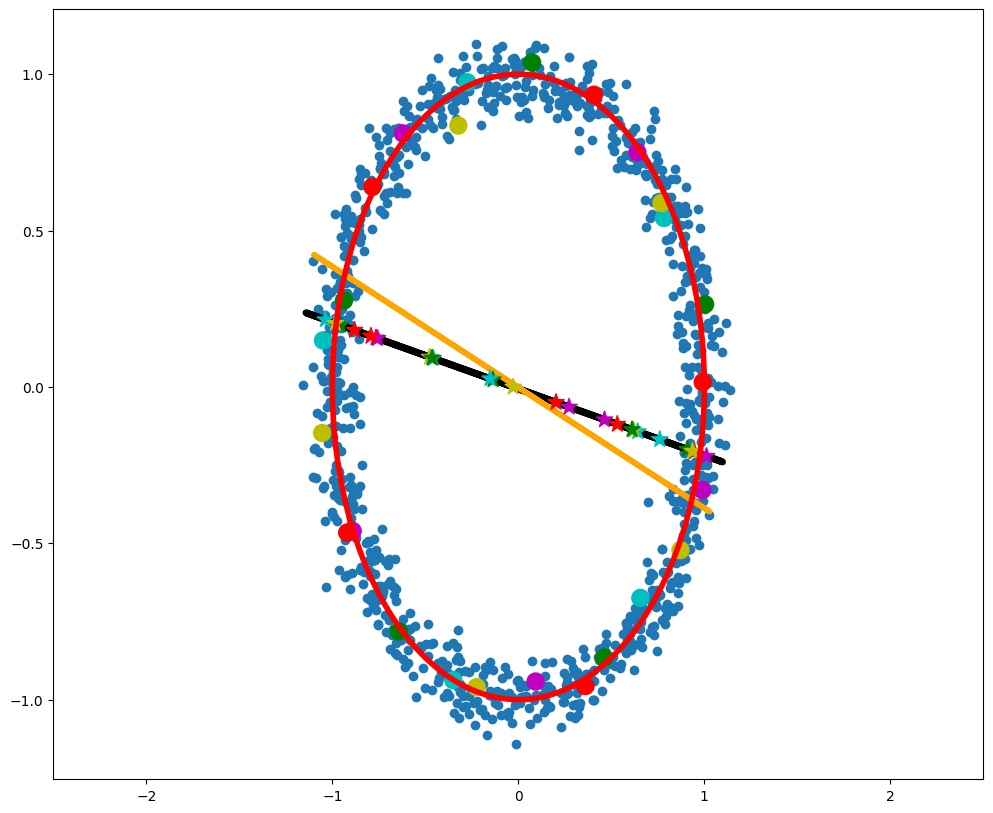

In [72]:
plt.figure(figsize=(12, 10))
plt.xlim([-2.5, 2.5])
plt.scatter(dots[:, 0], dots[:, 1], zorder=1)
plt.plot(fx, fy,  color="red", linewidth=4, zorder=10)
plt.plot(pdots[:,0], pdots[:,1], color='black', linewidth=5, zorder=3)
plt.plot(pdots_pca[:,0], pdots_pca[:,1], color='orange', linewidth=4, zorder=4)
plt.scatter(vpdots[:,0], vpdots[:,1], color=colors*5, marker='*', s=150, zorder=5)
plt.scatter(vdots[:,0], vdots[:,1], color=colors*5, s=150, zorder=6)
plt.grid(False)

In [73]:
def deep_ae():
    input_dots = Input((2,))
    x = Dense(64, activation='elu')(input_dots)
    x = Dense(64, activation='elu')(x)
    code = Dense(1, activation='linear')(x)
    x = Dense(64, activation='elu')(code)
    x = Dense(64, activation='elu')(x)
    out = Dense(2, activation='linear')(x)

    ae = Model(input_dots, out)
    return ae

dae = deep_ae()
dae.compile(Adam(0.003), 'mse')

dae.fit(dots, dots, epochs=200, batch_size=30, verbose=0)
pdots_d = dae.predict(dots, batch_size=30)
vpdots_d = pdots_d[idxs]

34/34 [==============================] - 0s 533us/step


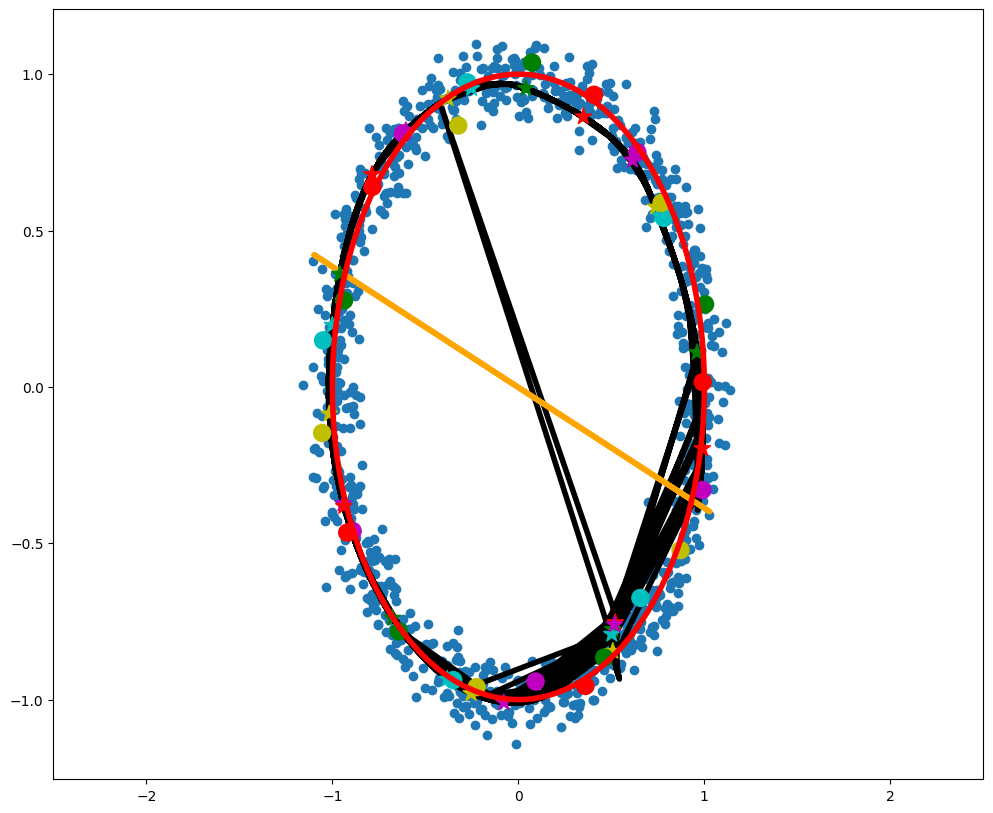

In [74]:
plt.figure(figsize=(12, 10))
plt.xlim([-2.5, 2.5])
plt.scatter(dots[:, 0], dots[:, 1], zorder=1)
plt.plot(fx, fy,  color="red", linewidth=4, zorder=10)
plt.plot(pdots_d[:,0], pdots_d[:,1], color='black', linewidth=4, zorder=3)
plt.plot(pdots_pca[:,0], pdots_pca[:,1], color='orange', linewidth=4, zorder=4)
plt.scatter(vpdots_d[:,0], vpdots_d[:,1], color=colors*5, marker='*', s=150, zorder=5)
plt.scatter(vdots[:,0], vdots[:,1], color=colors*5, s=150, zorder=6)
plt.grid(False)

In [87]:
dae2 = deep_ae()
dae2.compile(Adam(0.003), 'mse')

dae2.fit(dots, dots, epochs=20, batch_size=30, verbose=0)
pdots_d2 = dae2.predict(dots, batch_size=30)
vpdots_d2 = pdots_d[idxs]

34/34 [==============================] - 0s 550us/step


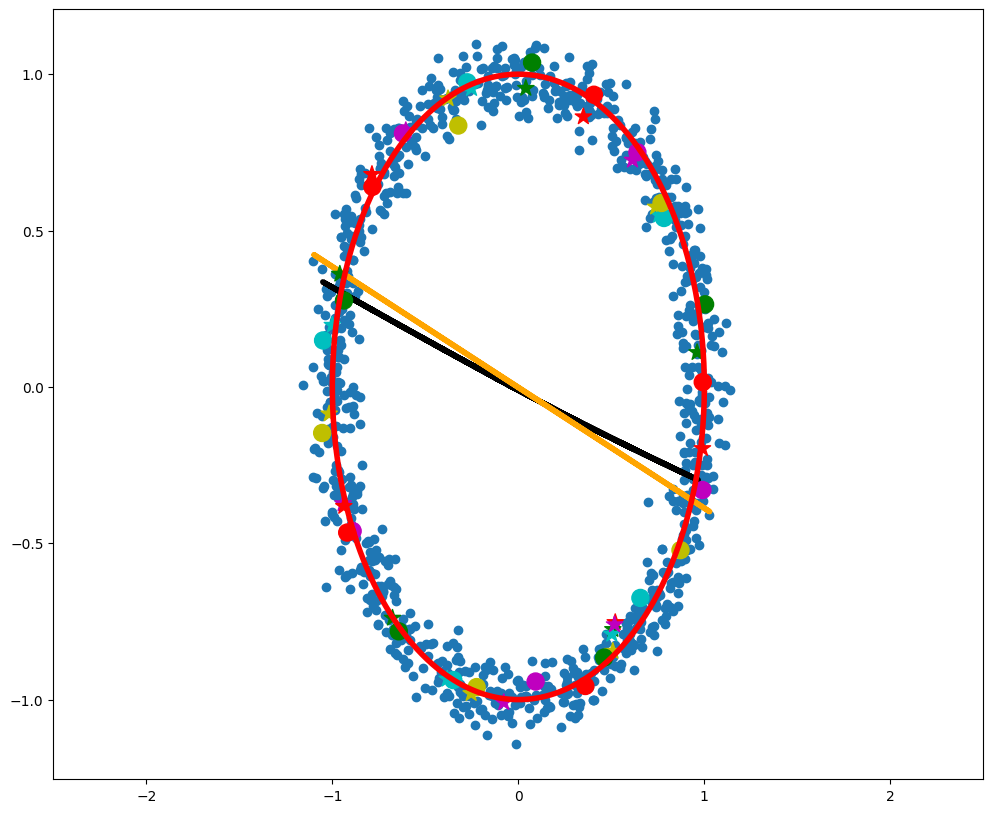

In [88]:
plt.figure(figsize=(12, 10))
plt.xlim([-2.5, 2.5])
plt.scatter(dots[:, 0], dots[:, 1], zorder=1)
plt.plot(fx, fy,  color="red", linewidth=4, zorder=10)
plt.plot(pdots_d2[:,0], pdots_d2[:,1], color='black', linewidth=4, zorder=3)
plt.plot(pdots_pca[:,0], pdots_pca[:,1], color='orange', linewidth=4, zorder=4)
plt.scatter(vpdots_d2[:,0], vpdots_d2[:,1], color=colors*5, marker='*', s=150, zorder=5)
plt.scatter(vdots[:,0], vdots[:,1], color=colors*5, s=150, zorder=6)
plt.grid(False)